In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np

In [18]:
column_names = [
    "Frequency",
    "Angle of attack",
    "Chord length",
    "Free-stream velocity",
    "Suction side displacement thickness",
    "Sound pressure level"
]

df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, names=column_names)


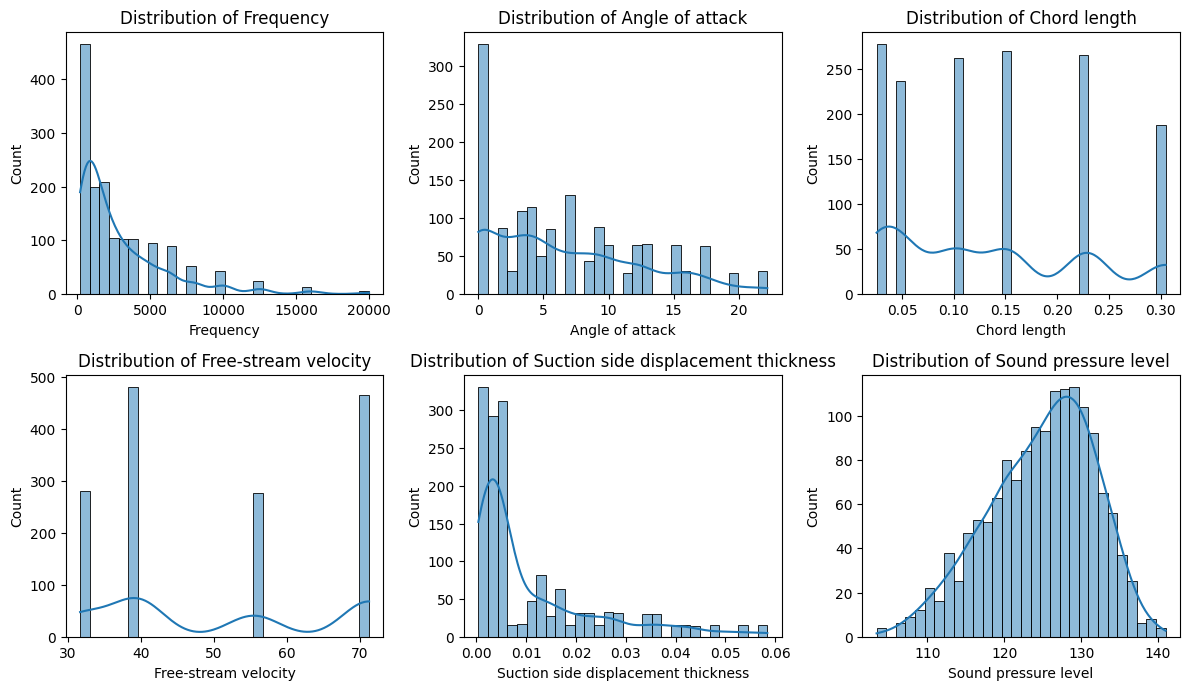

In [19]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

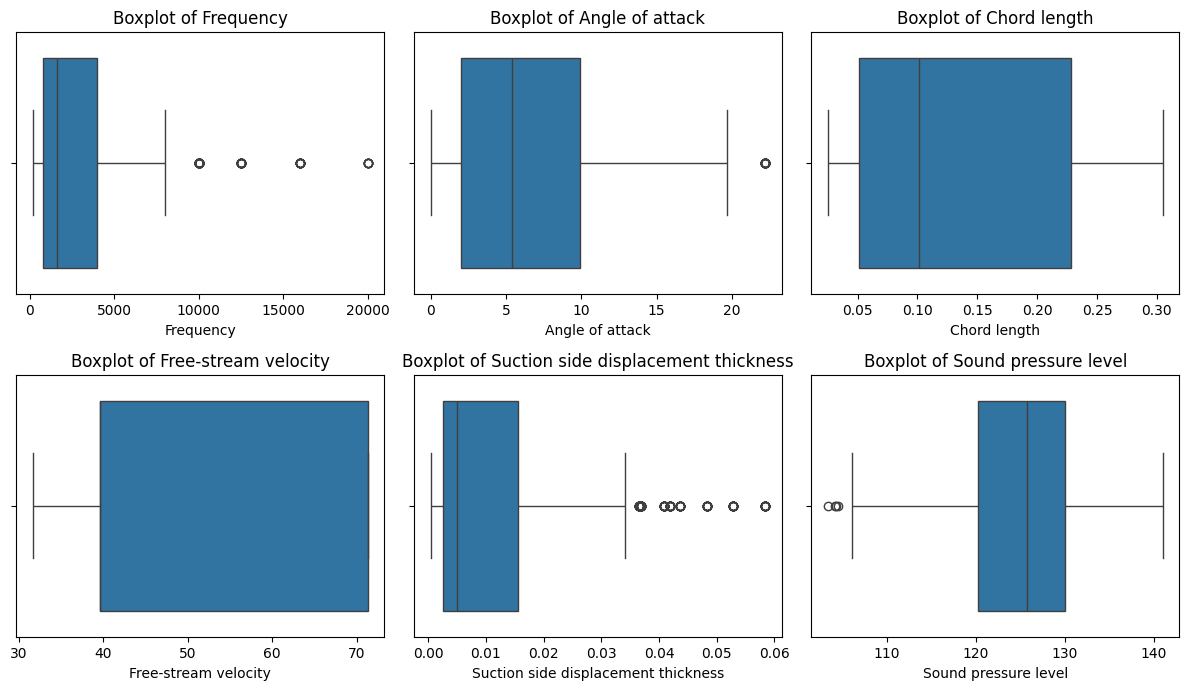

In [20]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

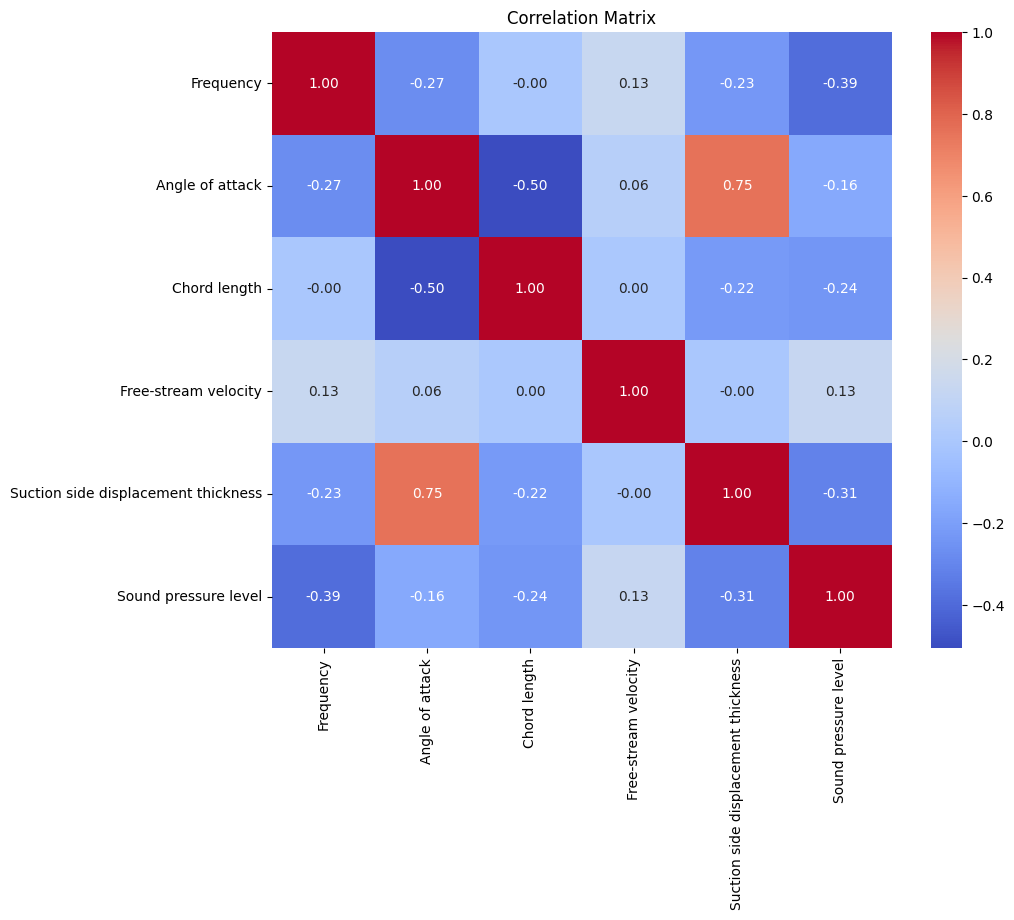

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

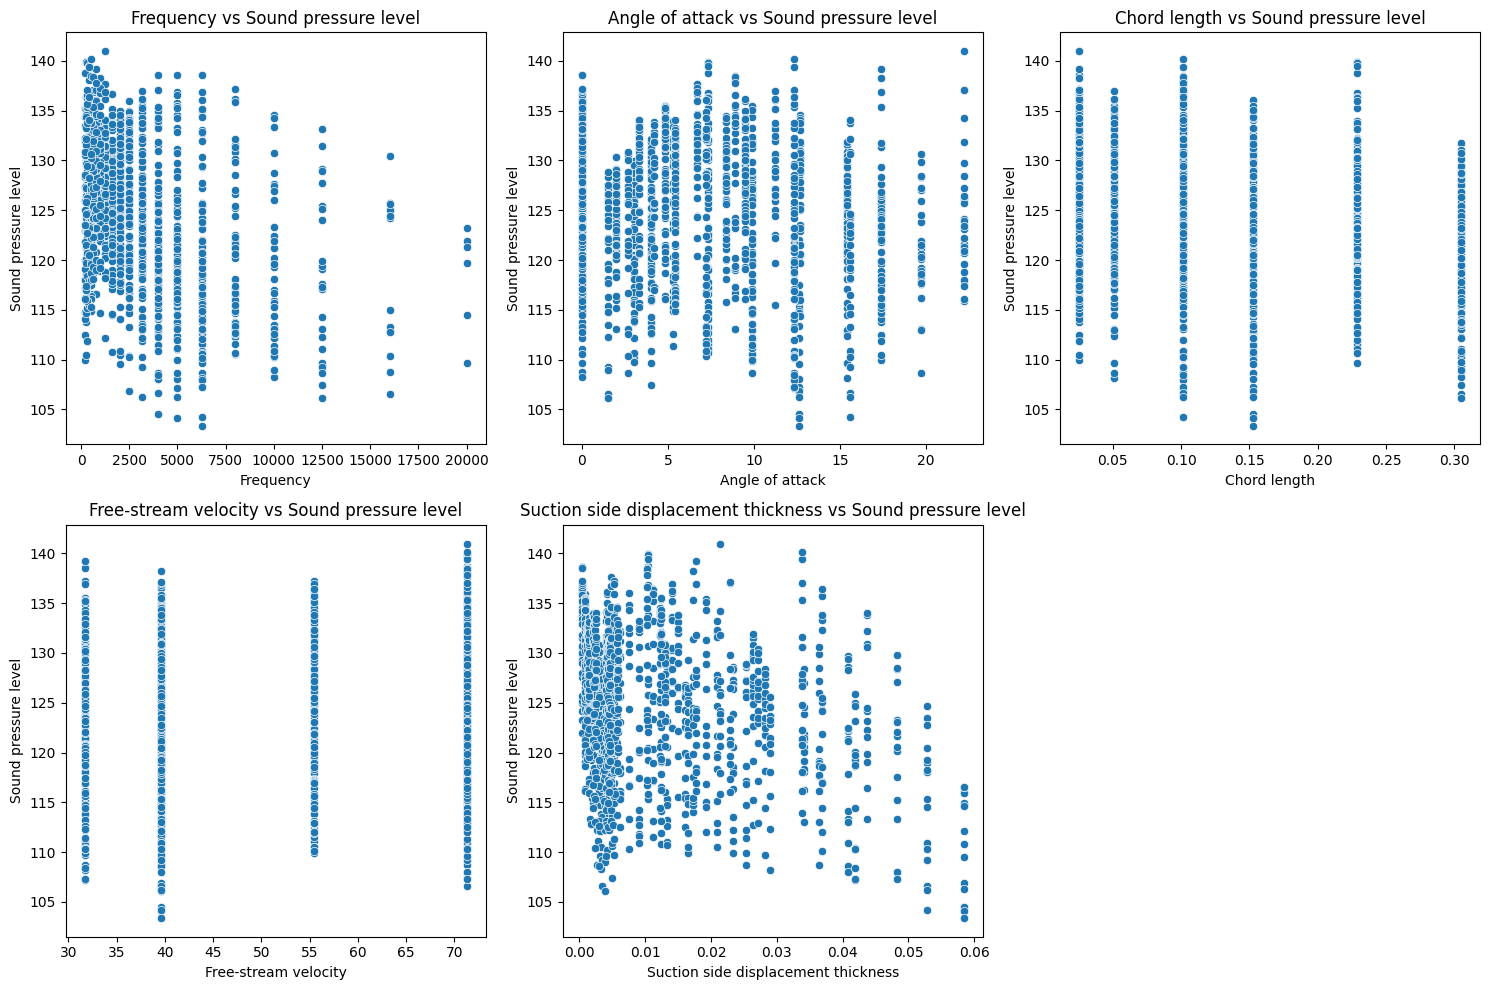

In [22]:
# ──────── Scatter Plots: All features vs Sound pressure level ────────
features = [
    "Frequency",
    "Angle of attack",
    "Chord length",
    "Free-stream velocity",
    "Suction side displacement thickness"
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y="Sound pressure level")
    plt.title(f"{feature} vs Sound pressure level")
plt.tight_layout()
plt.show()


In [23]:
duplicate_rows = df.duplicated().sum()
print(f"Дубликатов: {duplicate_rows}")

feature_columns = df.columns[:-1]

duplicates_by_features = df.duplicated(subset=feature_columns, keep=False)

contradictions = df[duplicates_by_features].sort_values(by=list(feature_columns))
print(f"Противоречивых записей: {len(contradictions)}")


Дубликатов: 0
Противоречивых записей: 0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

mask_no_outliers = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Число выбросов по IQR: {(~mask_no_outliers).sum()}")
df_iqr_cleaned = df[mask_no_outliers]

z_scores = np.abs(zscore(df))
mask_no_outliers_z = (z_scores < 3).all(axis=1)

print(f"Число выбросов по Z-оценке: {(~mask_no_outliers_z).sum()}")
df_z_cleaned = df[mask_no_outliers_z]


Число выбросов по IQR: 240
Число выбросов по Z-оценке: 76


In [34]:
missing = df.isnull().sum()
print(f"Количество пропущенных значений:\n{missing}")
print(f"Всего пропущенных значений: {df.isnull().sum().sum()}")


Количество пропущенных значений:
Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Sound pressure level                   0
dtype: int64
Всего пропущенных значений: 0
